# Bayesian Inference for Vector AutoRegression (VAR) Models

## Introduction to Bayesian VAR

Bayesian inference provides a powerful framework for estimating the parameters of *Vector AutoRegression* (VAR) models, incorporating prior knowledge and uncertainty into the analysis. Unlike classical estimation methods that rely solely on the observed data, Bayesian approaches allow for the integration of prior beliefs about the parameters' likely values, which can be particularly useful in situations with limited or noisy data.

### Bayesian VAR Process

The *Bayesian VAR* (BVAR) model extends the traditional VAR model by applying Bayes' theorem to estimate the posterior distributions of the model's parameters. The general formulation of a VAR(p) model in the Bayesian framework can be expressed as:

$$ X_t = A_1 \cdot X_{t-1} + A_2 \cdot X_{t-2} + \dots + A_p \cdot X_{t-p} + \epsilon_t $$

where:
- $ X_t $ is the vector of variables at time $ t $,
- $ A_1, A_2, \dots, A_p $ are the matrices of coefficients for each lag,
- $ \epsilon_t $ is the vector of error terms, which are assumed to follow a normal distribution with mean 0 and covariance matrix $ \Sigma $.

In the Bayesian setting, the focus shifts to estimating the posterior distributions of the coefficients $ A_1, A_2, \dots, A_p $ and the error covariance matrix $ \Sigma $ given the observed data and prior distributions for these parameters.

### Implementation in `VARinfer.py`

A typical Bayesian VAR model implementation involves:

1. **Defining Prior Distributions**: Specifying prior distributions for the VAR model parameters based on previous studies, expert knowledge, or other relevant information.
2. **Computing Posterior Distributions**: Using Bayes' theorem to update the prior distributions with information from the observed data, resulting in posterior distributions that reflect both the prior beliefs and the evidence from the data.
3. **Parameter Estimation and Inference**: Drawing samples from the posterior distributions of the model parameters to perform inference, estimate model dynamics, and make predictions.
4. **Visualization and Analysis**: Generating plots and summaries of the posterior distributions, predicted values, and other quantities of interest to analyze the model results.

## Notebook Structure

This notebook demonstrates how to run BVAR inference on simulated data using the `VARinfer` class. We will explore different methodologies for importing data, estimating the posterior distributions of a VAR model, and visualizing the results to gain insights into the dynamics of the system.

## Objective

Our goal is to infer the posterior distribution of a VAR model's parameters using Bayesian methods. By employing the `VARinfer` class, we aim to visualize the posterior distributions and leverage the `plot_posteriors` method to extract and understand the dynamics inherent in the VAR model process.


## Example Usage

The first step is obtaining the data to be used in the analysis. In this example, we will simulate a VAR(1) process with 2 variables and 100 observations. We will then use the `VARinfer` class to estimate the posterior distributions of the model parameters and visualize the results.

In [1]:
from mimic.model_simulate.VARsim import *
from mimic.model_infer.VARinfer import *

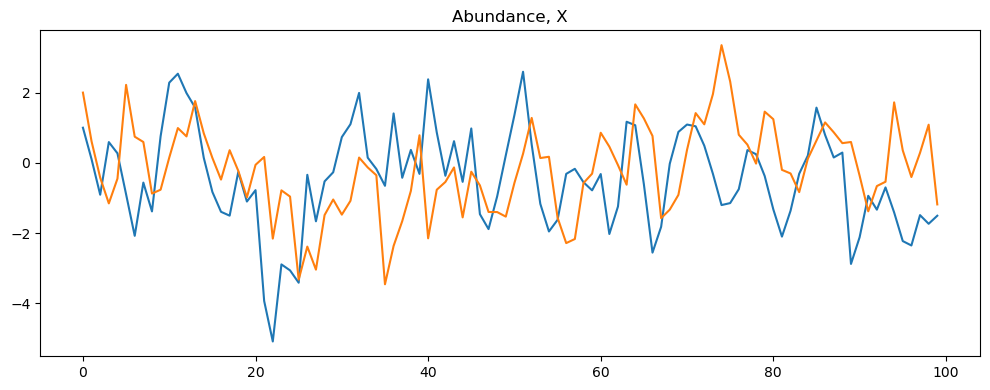

In [2]:
# Import parameters from JSON file

parameters = read_parameters('parameters.json')
simulator = VARSimulator(**parameters)
simulator.run("VARsim")

x0: Shape.0
data[1:, :]: (99, 2)
x0: (2, 1)
mu: Shape.0
data: (99, 2)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [x0, A, noise_chol]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 7 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
x0[0, 0] -0.232  0.113  -0.440   -0.019      0.002    0.001    4619.0   
x0[1, 0]  0.009  0.099  -0.167    0.207      0.001    0.001    4661.0   
A[0, 0]   0.663  0.075   0.522    0.803      0.001    0.001    4264.0   
A[0, 1]  -0.302  0.082  -0.453   -0.147      0.001    0.001    4705.0   
A[1, 0]   0.282  0.066   0.160    0.410      0.001    0.001    3798.0   
A[1, 1]   0.538  0.076   0.393    0.680      0.001    0.001    4436.0   

          ess_tail  r_hat  
x0[0, 0]    3141.0    1.0  
x0[1, 0]    3260.0    1.0  
A[0, 0]     3427.0    1.0  
A[0, 1]     2958.0    1.0  
A[1, 0]     3003.0    1.0  
A[1, 1]     2993.0    1.0  


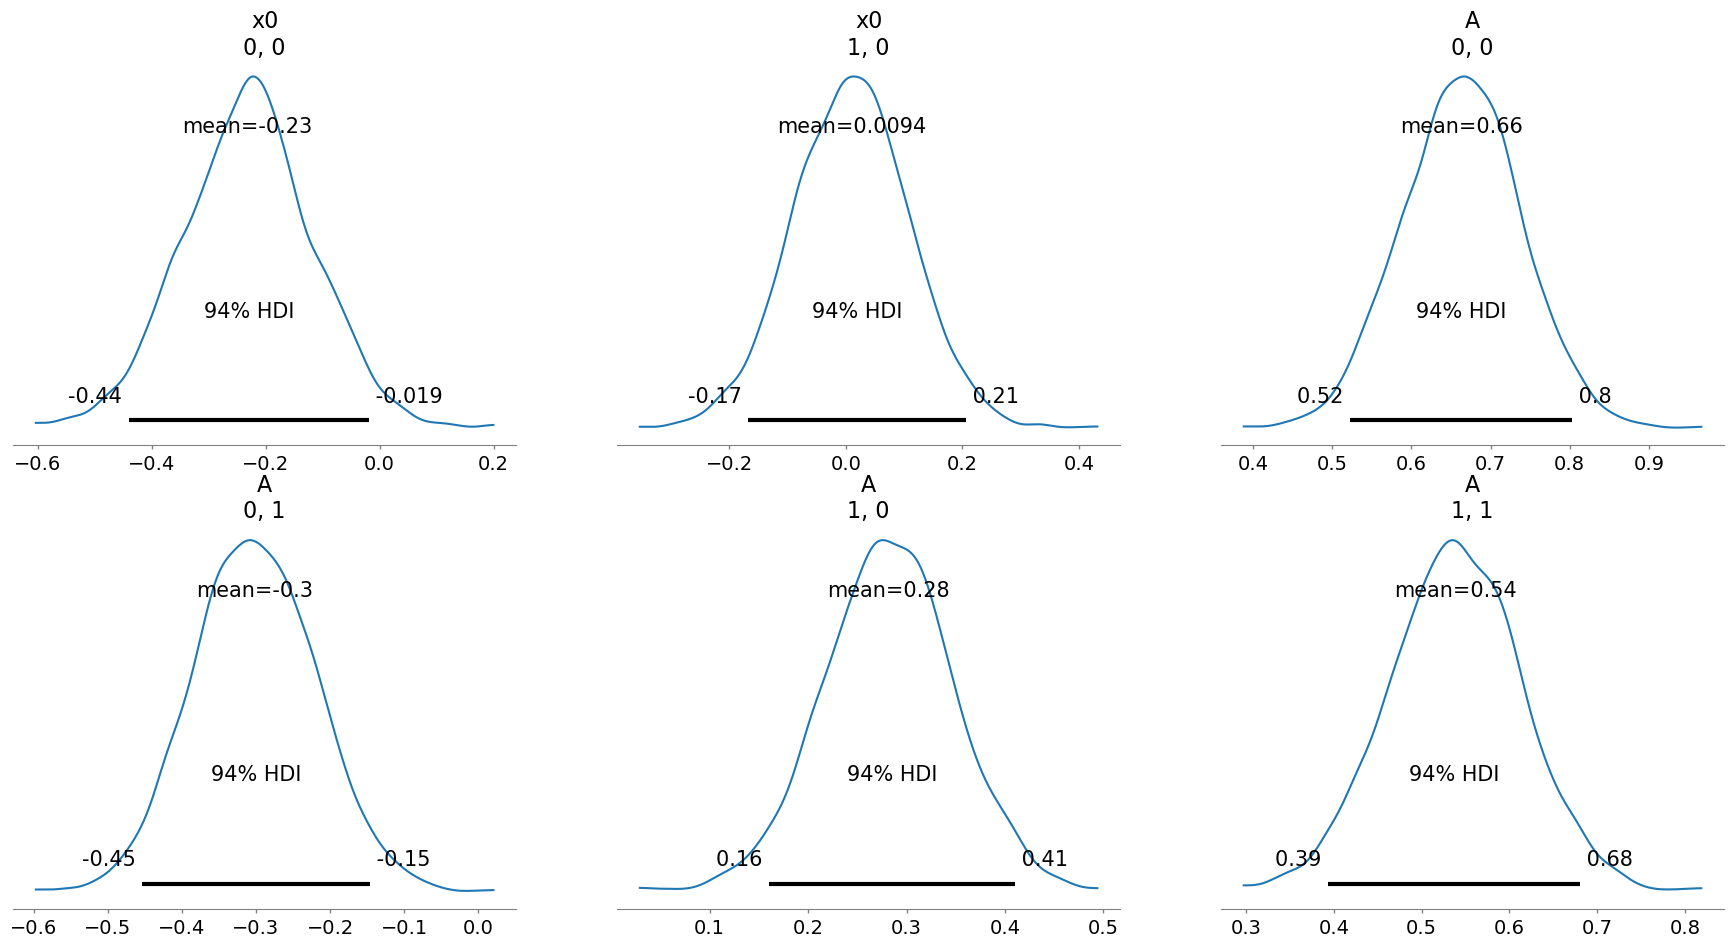

In [3]:
infer = VARInfer(simulator.data)
infer.run_inference()

In [7]:
import os

# Get the current directory
current_dir = os.getcwd()

# Add the examples/examples-inf-BVAR directory to the current directory
current_dir = os.path.join(current_dir, 'examples/examples-inf-BVAR')

# Construct the full path to the CSV file
csv_file_path = os.path.join(current_dir, 'simulated_data.csv')

# Create an instance of VARInfer and import the data
infer2 = VARInfer(data=None)
infer2.import_data(csv_file_path)

x0: Shape.0
data[1:, :]: (99, 2)
x0: (2, 1)
mu: Shape.0
data: (99, 2)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [x0, A, noise_chol]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 8 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
x0[0, 0]  0.073  0.106  -0.127    0.270      0.001    0.001    5598.0   
x0[1, 0]  0.008  0.106  -0.185    0.215      0.001    0.002    5036.0   
A[0, 0]   0.807  0.070   0.668    0.935      0.001    0.001    4874.0   
A[0, 1]  -0.260  0.079  -0.405   -0.110      0.001    0.001    4947.0   
A[1, 0]   0.356  0.069   0.227    0.484      0.001    0.001    4217.0   
A[1, 1]   0.476  0.075   0.334    0.620      0.001    0.001    4092.0   

          ess_tail  r_hat  
x0[0, 0]    3327.0    1.0  
x0[1, 0]    3473.0    1.0  
A[0, 0]     3029.0    1.0  
A[0, 1]     3372.0    1.0  
A[1, 0]     2967.0    1.0  
A[1, 1]     3318.0    1.0  


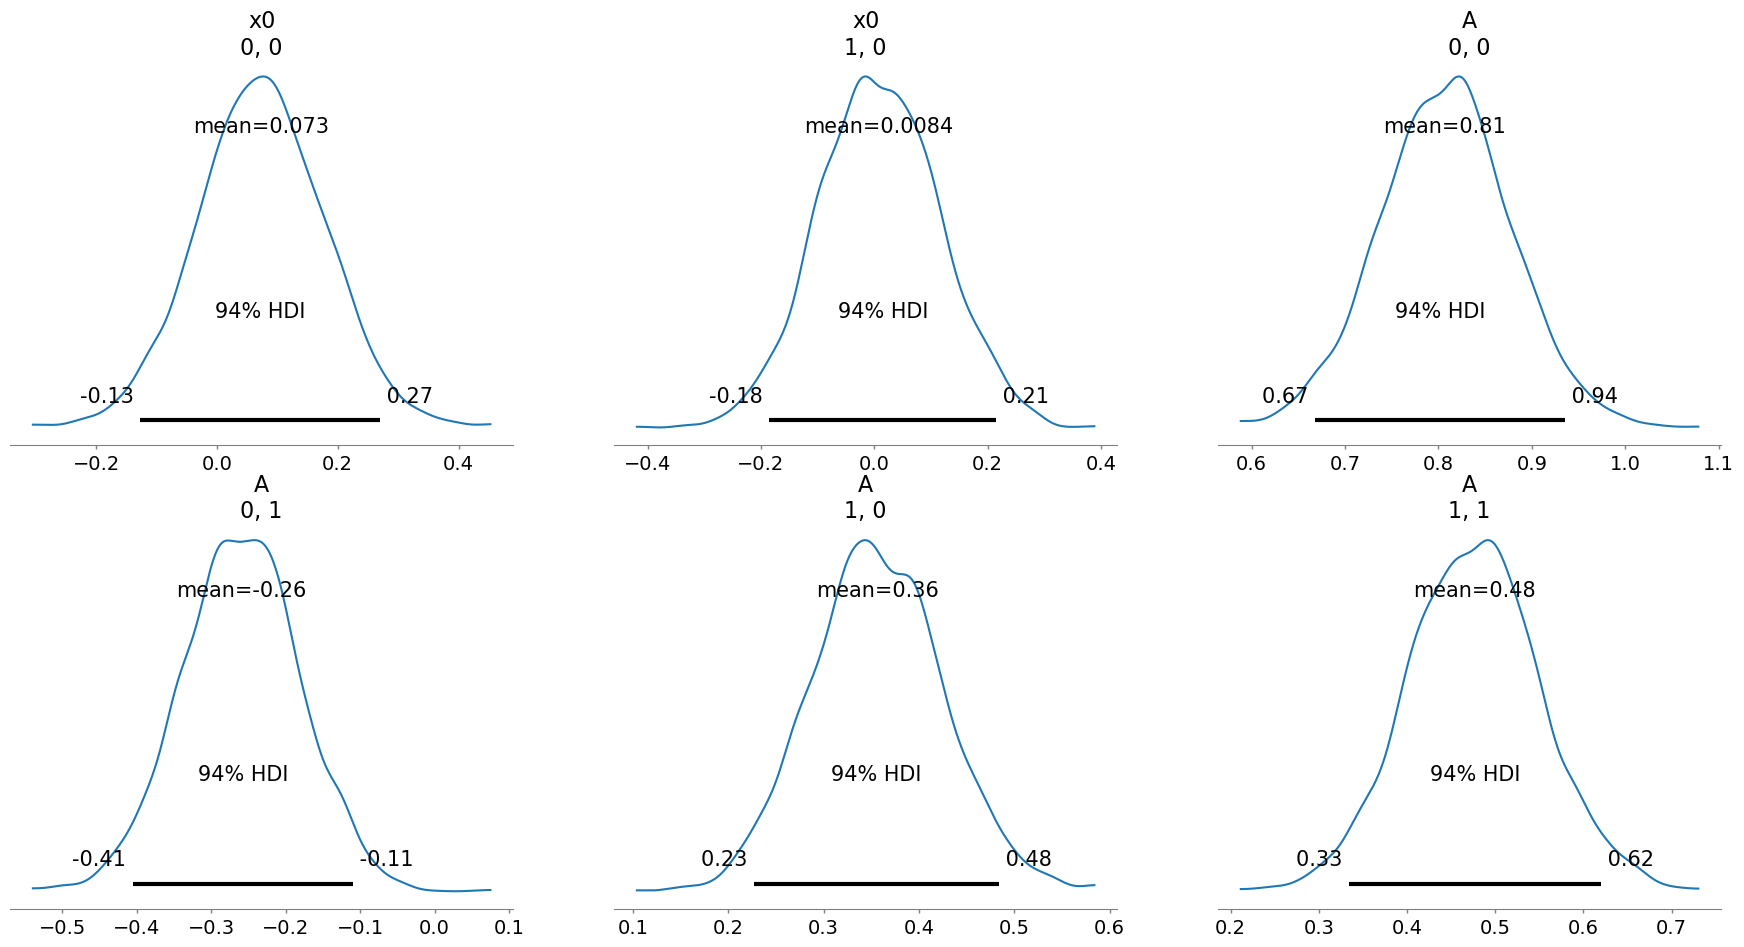

In [8]:
infer2.run_inference()